In [1]:
## Data Story for Online Shopping Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('C:/Users/michael.thabane/Documents/Springboard/Capstone1/online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
# Run descriptive analysis on Data

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# Examine the Variables which are harder to determine if they are Categorical and Continuous

In [6]:
data['Administrative'].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
20       2
21       2
26       1
27       1
Name: Administrative, dtype: int64

In [7]:
data['Informational'].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
11       1
13       1
24       1
16       1
Name: Informational, dtype: int64

In [8]:
data['SpecialDay'].value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

In [9]:
data['ProductRelated'].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64

In [10]:
### CLASSIFACTION OF VARIABLES

##### Administrative - Categorical
##### Administrative_Duration - Continuous
##### Informational - Categorical 
##### Informational_Duration - Continuous
##### ProductRelated - Continuous
##### ProductRelated_Duration - Continuous
##### BounceRates - Continuous (Percentage)
##### ExitRates - Continuous (Percentage)
##### PageValues - Continuous
##### SpecialDay - Categorical 
##### Month - Categorical
##### OperatingSystems - Categorical
##### Browser - Categorical
##### Region - Categorical
##### TrafficType - Categorical
##### VisitorType - Categorical
##### Weekend - Categorical (Boolean)
##### Revenue - Categorical (Boolean)

In [11]:
# Convert Boolen Column to String Categorical Variable
daytype = {True : 'Weekend', False : 'Weekday'}
UserResult = {True: 'Purchase', False: 'Browse'}
data['Weekend'] = data['Weekend'].map(daytype)
data['Revenue'] = data['Revenue'].map(UserResult)

In [12]:
# Count the number of Missing Values per column
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [2]:
# Split the data into 2 different groups of Revenue and examine the difference in the descriptive statistics
Purchase = data[data.Revenue == True]
Browse = data[data.Revenue == False]
Purchase.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488
std,3.730527,201.114732,1.521176,171.619131,58.267365,2312.214392,0.012185,0.016463,35.191954,0.123521,0.929779,1.897042,2.407173,3.987140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,15.000000,541.906250,0.000000,0.009521,3.641144,0.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,52.366667,0.000000,0.000000,29.000000,1109.906250,0.000000,0.016000,16.758134,0.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,151.083333,1.000000,19.000000,57.000000,2266.011310,0.006452,0.025000,38.897742,0.000000,2.000000,2.000000,4.000000,4.000000
max,26.000000,2086.750000,12.000000,1767.666667,534.000000,27009.859430,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [3]:
Browse.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000,10422.000000
mean,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
std,3.202481,171.017970,1.211582,133.909306,40.744717,1803.797757,0.051877,0.051231,9.072424,0.209054,0.907835,1.681790,2.400493,4.032220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,6.000000,151.000000,0.000000,0.015560,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,16.000000,510.190000,0.004255,0.028571,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,3.000000,83.000000,0.000000,0.000000,35.000000,1331.816667,0.020000,0.053846,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000


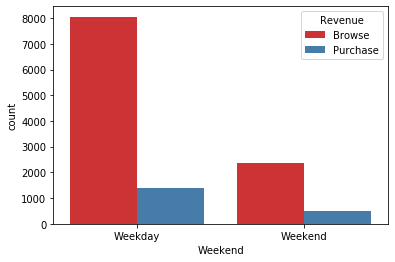

In [15]:
# Histograms to see the relationship between Categorical variables and outcome of interest (Revenue)
sns.countplot(x='Weekend', hue='Revenue', data=data, palette='Set1')


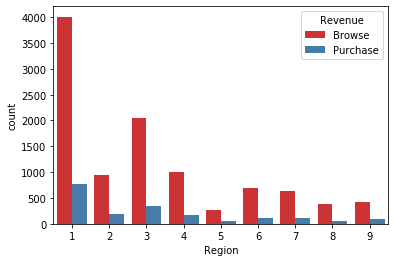

In [16]:
sns.countplot(x='Region', hue='Revenue', data=data, palette='Set1')

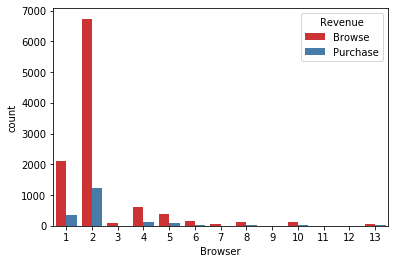

In [17]:
sns.countplot(x='Browser', hue='Revenue', data=data, palette='Set1')

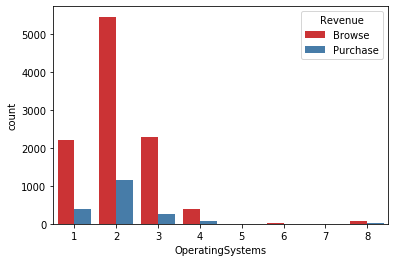

In [18]:
sns.countplot(x='OperatingSystems', hue='Revenue', data=data, palette='Set1')

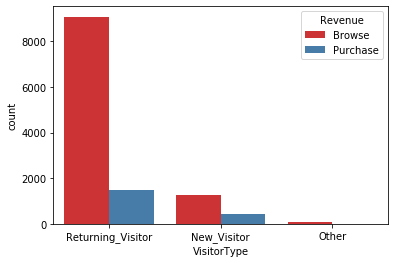

In [19]:
sns.countplot(x='VisitorType', hue='Revenue', data=data, palette='Set1')

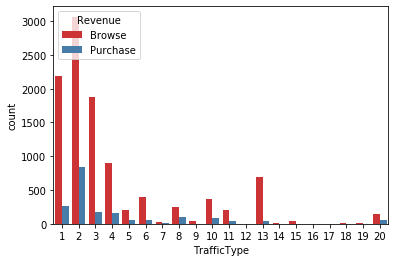

In [20]:
sns.countplot(x='TrafficType', hue='Revenue', data=data, palette='Set1')

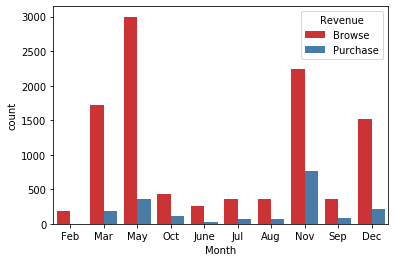

In [21]:
sns.countplot(x='Month', hue='Revenue', data=data, palette='Set1')

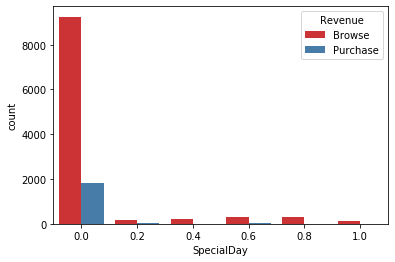

In [22]:
sns.countplot(x='SpecialDay', hue='Revenue', data=data, palette='Set1')

In [23]:
# Scatter plot to see relationships between (Administrative, Administrative_Duration), (Informational, Informational_Duration), 
# (ProductRelated, ProductRelated_Duration) and the outcome of interest ------ Revenue

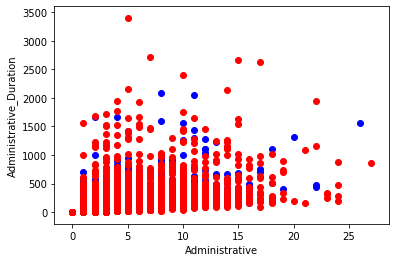

In [4]:
_ = plt.scatter(x= Purchase['Administrative'], y=Purchase['Administrative_Duration'], color='b')
_ = plt.scatter(x= Browse['Administrative'], y=Browse['Administrative_Duration'], color='r')
_ = plt.xlabel('Administrative')
_ = plt.ylabel('Administrative_Duration')
plt.show()

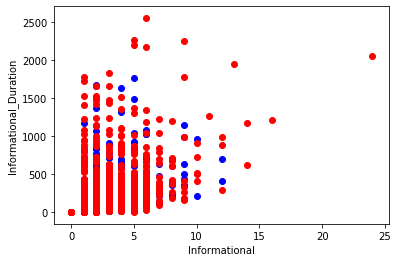

In [5]:
_ = plt.scatter(x= Purchase['Informational'], y=Purchase['Informational_Duration'], color='b')
_ = plt.scatter(x= Browse['Informational'], y=Browse['Informational_Duration'], color='r')
_ = plt.xlabel('Informational')
_ = plt.ylabel('Informational_Duration')
plt.show()

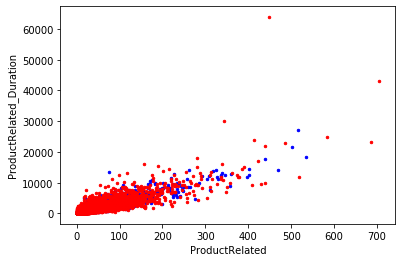

In [6]:
_ = plt.scatter(x= Purchase['ProductRelated'], y=Purchase['ProductRelated_Duration'], color='b',s=6)
_ = plt.scatter(x= Browse['ProductRelated'], y=Browse['ProductRelated_Duration'], color='r',s=6)
_ = plt.xlabel('ProductRelated')
_ = plt.ylabel('ProductRelated_Duration')
plt.show()

In [27]:
# Use bloxplots to determine if the BounceRates, ExitRates & PageValues have an effect on Revenue

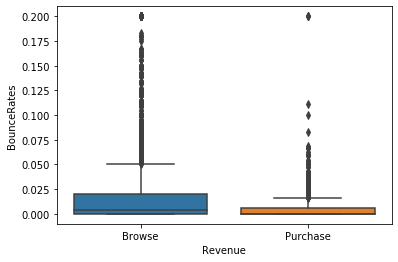

In [28]:
sns.boxplot(x='Revenue',y='BounceRates',data=data)

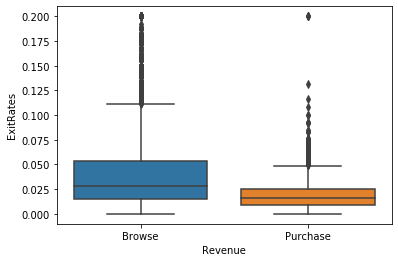

In [29]:
sns.boxplot(x='Revenue',y='ExitRates',data=data)

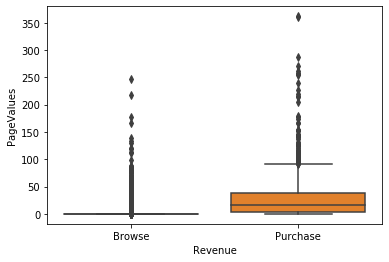

In [30]:
sns.boxplot(x='Revenue',y='PageValues',data=data)

In [31]:
#convert categorical variables into category data type (did not change orginal dataset)
data2 = data
data2['Month'] = data2['Month'].astype('category')
data2['VisitorType'] = data2['VisitorType'].astype('category')
data2['Weekend'] = data2['Weekend'].astype('category')
data2['Revenue'] = data2['Revenue'].astype('category')

In [32]:
data2['Weekend_num'] = data['Weekend'].cat.codes
data2['Revenue_num'] = data['Revenue'].cat.codes

In [33]:
data2['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [34]:
data2['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\michael.thabane\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


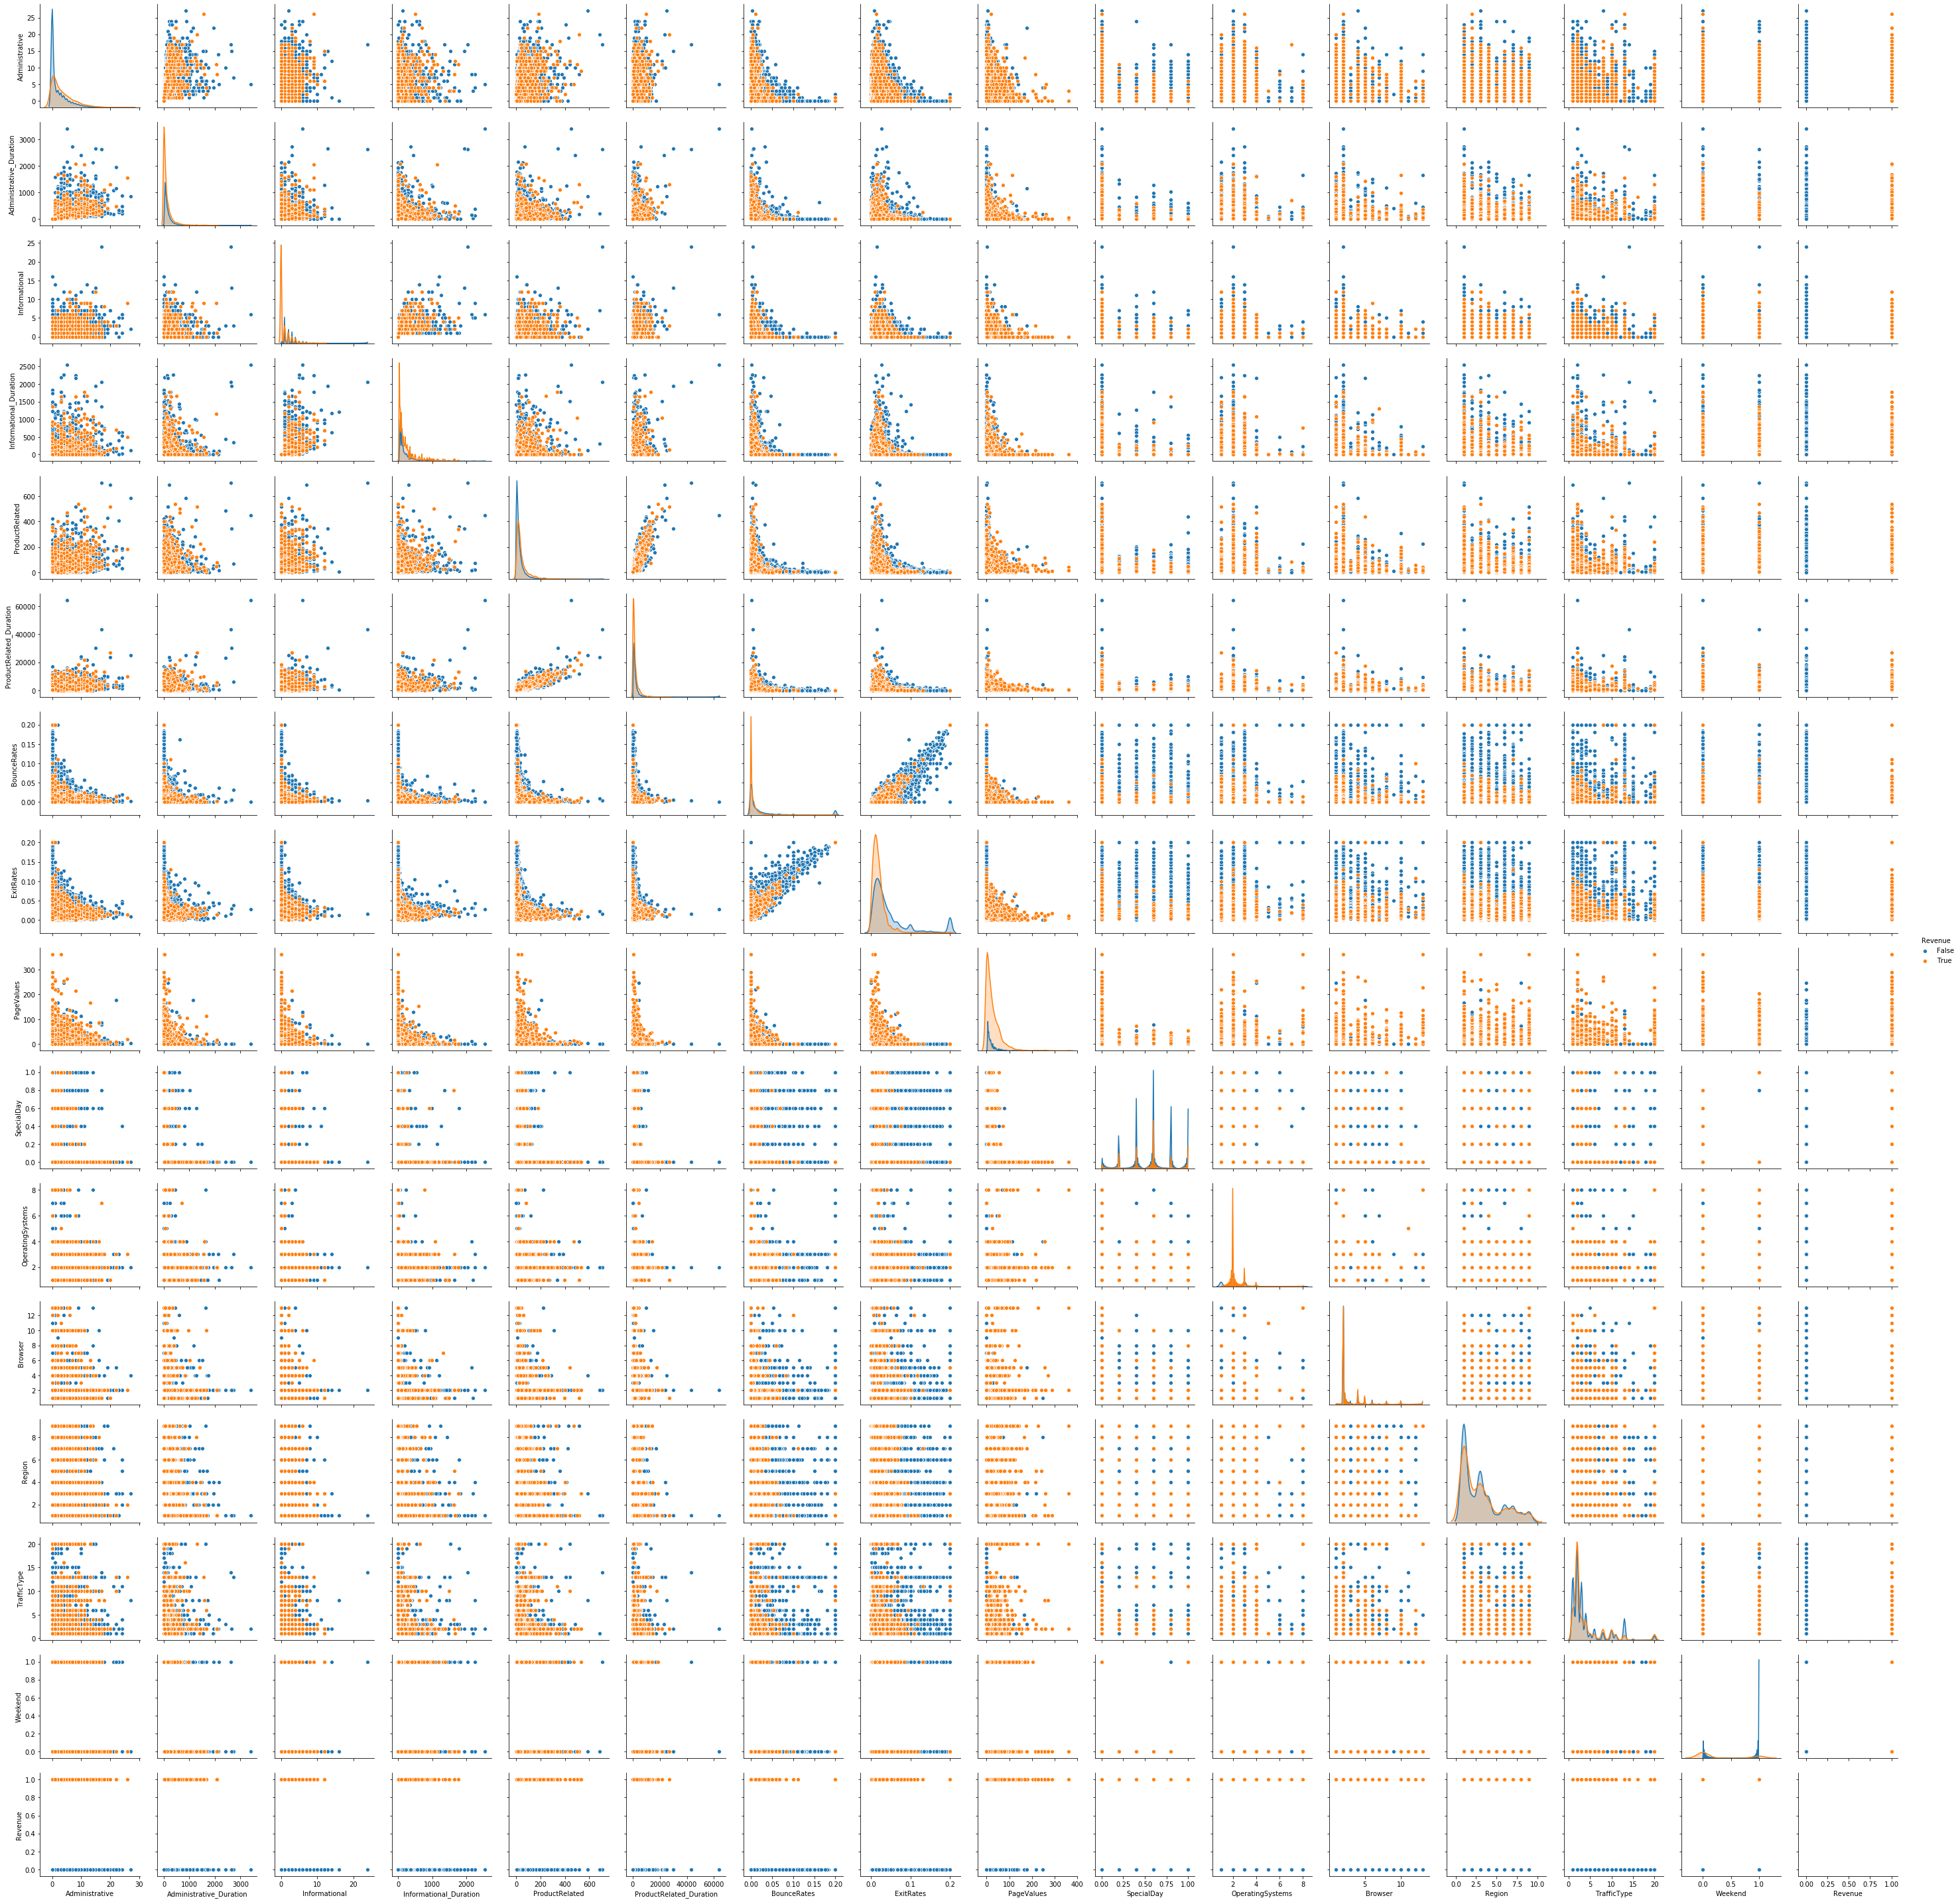

In [7]:
sns.pairplot(data, hue='Revenue')